# Feature Selection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_selection import mutual_info_classif

In [2]:
df = pd.read_csv ('../DATA/BRFSS.csv')
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,b'03012023',b'03',b'01',b'2023',1100.0,b'2023000001',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0,1.0,1.0,9.0
1,1.0,1.0,b'01062023',b'01',b'06',b'2023',1100.0,b'2023000002',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,b'03082023',b'03',b'08',b'2023',1100.0,b'2023000003',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,b'03062023',b'03',b'06',b'2023',1100.0,b'2023000004',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,b'01062023',b'01',b'06',b'2023',1100.0,b'2023000005',2.023000e+09,1.0,...,7.000000e+00,1.0,4.700000e+01,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [3]:
df = pd.read_csv ('../DATA/BRFSS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Columns: 350 entries, _STATE to _DRNKDRV
dtypes: float64(345), object(5)
memory usage: 1.1+ GB


Xem xét các cột dữ liệu có kiểu là object

In [4]:
df_object = df.select_dtypes(include=['object']).copy()
df_object.head()

,IDATE,IMONTH,IDAY,IYEAR,SEQNO
0,b'03012023',b'03',b'01',b'2023',b'2023000001'
1,b'01062023',b'01',b'06',b'2023',b'2023000002'
2,b'03082023',b'03',b'08',b'2023',b'2023000003'
3,b'03062023',b'03',b'06',b'2023',b'2023000004'
4,b'01062023',b'01',b'06',b'2023',b'2023000005'


In [5]:
object_cols = df.select_dtypes(include=['object']).columns
df= df.drop(columns=object_cols)

**Kiểm tra cột mục tiêu có bị khuyết dữ liệu không, nếu có ta tiến hành loại bỏ**

In [6]:
print("Số lượng giá trị NaN trong target:", df['CVDINFR4'].isna().sum())
print(df['CVDINFR4'].value_counts(dropna=False))

Số lượng giá trị NaN trong target: 3
CVDINFR4
2.0    407304
1.0     23451
7.0      2314
9.0       251
NaN         3
Name: count, dtype: int64


In [7]:
df['CVDINFR4'] = df['CVDINFR4'].replace(2, 0)
df = df[~df['CVDINFR4'].isin([7, 9])]
df = df.dropna(subset=['CVDINFR4'])



**Kiểm tra các cột có quá nhiều giá trị bị khuyết và thực hiện loại bỏ các cột khuyết hơn 40%**

In [8]:
# Tính tổng số dòng (để tính % missing)
total_rows = len(df)

# Tính số lượng & phần trăm missing, sau đó sắp xếp
missing_stats = (
    df.isna().sum()
    .to_frame(name='Số lượng missing')  # Chuyển thành DataFrame
    .assign(Phần_trăm_missing=lambda x: (x['Số lượng missing'] / total_rows) * 100)
    .sort_values(by='Số lượng missing', ascending=False)
    .query("`Số lượng missing` > 0")  # Chỉ lấy cột có missing
)

print("Thống kê missing values (từ nhiều đến ít):")
print(missing_stats)

# Xóa các cột có tỉ lệ missing > 40%
# Lấy danh sách các cột cần xóa
columns_to_drop = missing_stats[missing_stats['Phần_trăm_missing'] > 40].index

# Xóa các cột này khỏi DataFrame
df = df.drop(columns=columns_to_drop)

# Thông báo kết quả
print("\nKết quả sau khi xóa cột:")
print(f"- Số cột có missing > 40%: {len(columns_to_drop)}")
print(f"- Số cột còn lại: {len(df.columns)}")

Thống kê missing values (từ nhiều đến ít):
          Số lượng missing  Phần_trăm_missing
NUMBURN3            430755         100.000000
WKENDOUT            430755         100.000000
INDORTAN            430755         100.000000
SUNPRTCT            430755         100.000000
WKDAYOUT            430755         100.000000
...                    ...                ...
CVDSTRK3                 1           0.000232
PERSDOC3                 1           0.000232
MENTHLTH                 1           0.000232
STRENGTH                 1           0.000232
HAVARTH4                 1           0.000232

[274 rows x 2 columns]

Kết quả sau khi xóa cột:
- Số cột có missing > 40%: 195
- Số cột còn lại: 150


Sau khi thực hiện xoá các cột có qúa nhiều dữ liệu khuyết, ta rà soát lại sau khi đã xoá


**Xử lý giá trị thiếu**
Tiến hành điền TRUNG VỊ (MEDIAN) vào các ô có dữ liệu thiếu


In [9]:
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=cols_to_drop)

In [10]:
def can_be_int(series):
    if pd.api.types.is_float_dtype(series):
        return all(x.is_integer() for x in series if pd.notna(x))
    return False
for col in df.columns:
    if can_be_int(df[col]):
        df[col] = df[col].astype(pd.Int64Dtype())  

In [11]:

cols = df.columns
df[cols] = df[cols].fillna(df[cols].median())


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430755 entries, 0 to 433322
Columns: 146 entries, _STATE to _DRNKDRV
dtypes: Int64(126), float64(20)
memory usage: 534.9 MB


**Xem xét tương quan các cột dữ liệu**

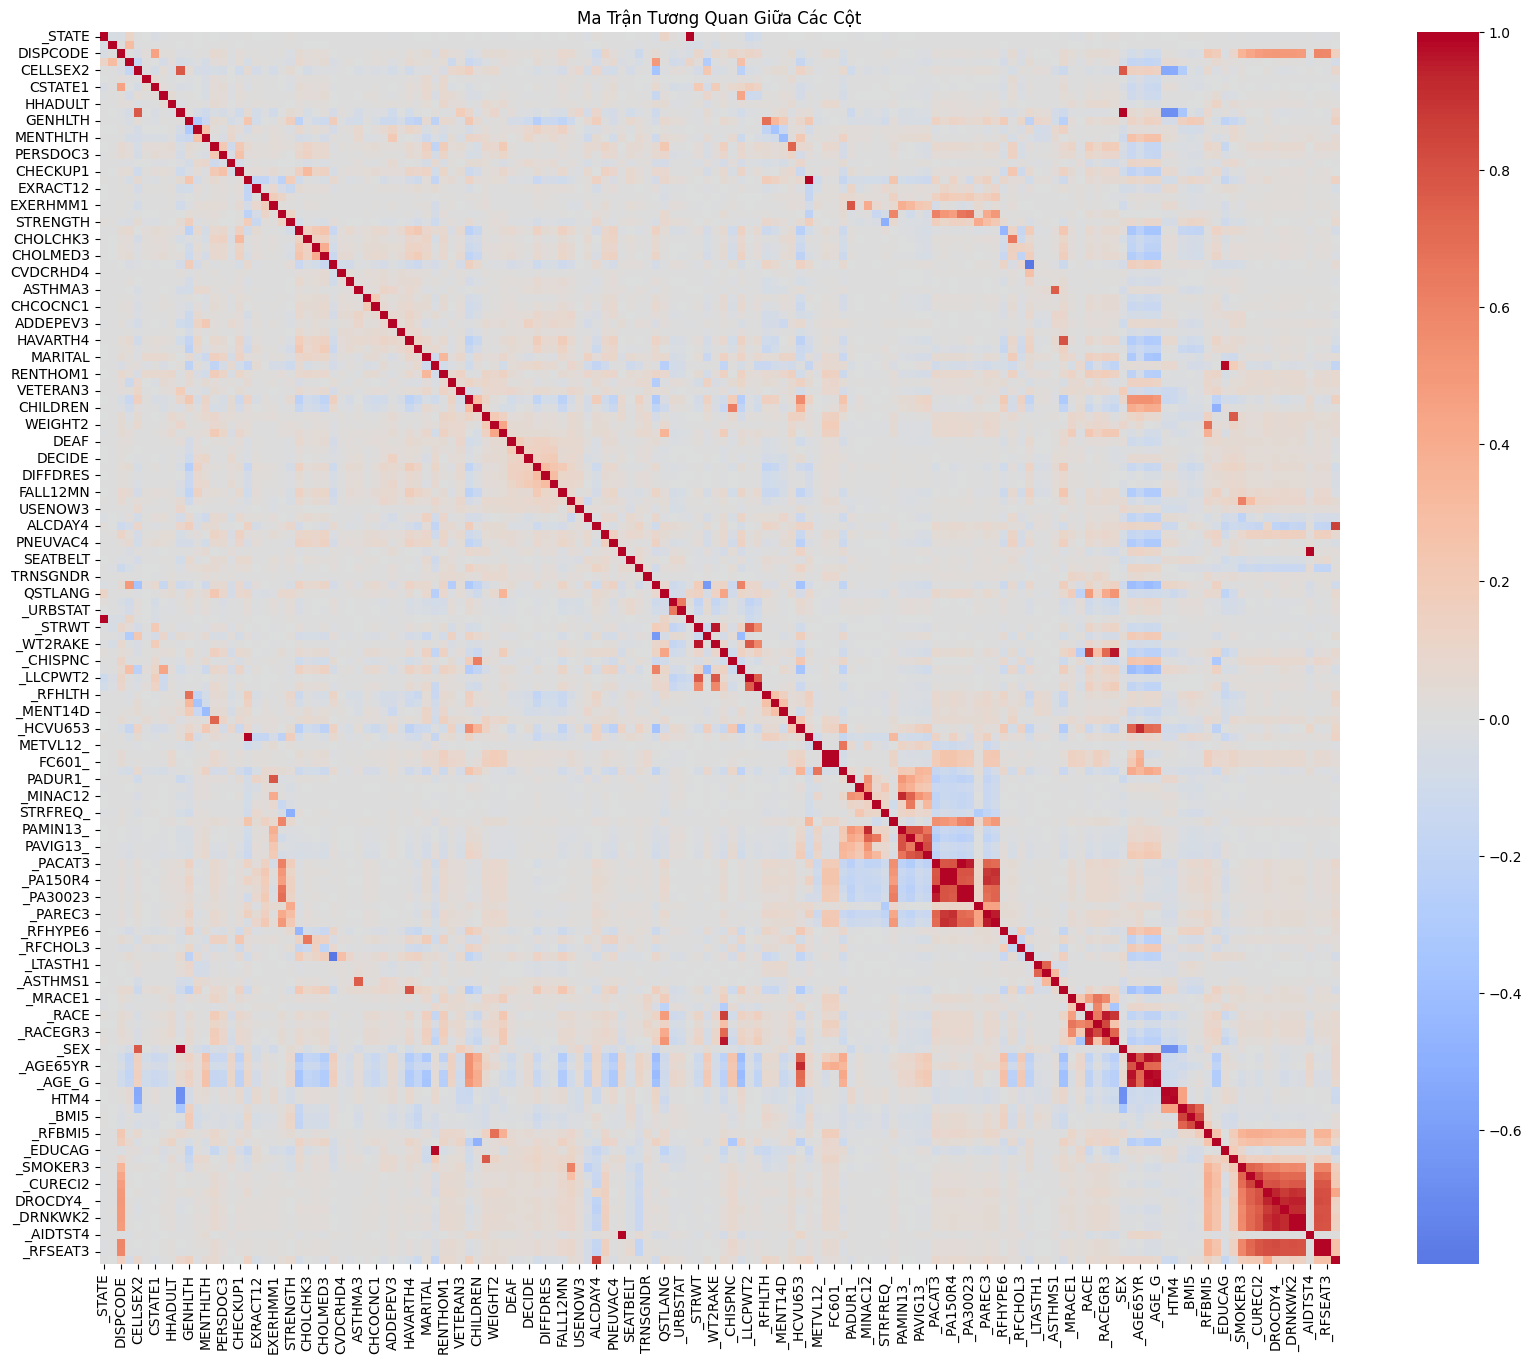

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Ma Trận Tương Quan Giữa Các Cột")
plt.show()


Dựa vào heatmap thể hiện mối tương quan bên trên, ta có thể dễ dàng nhận ra các vùng màu đỏ có mối tương quan thuận với nhau, ta có thể giảm đi số chiều dữ liệu nhờ đó

In [14]:
# Tách biến mục tiêu
target_col = 'CVDINFR4'
features = [col for col in df.columns if col != target_col]
X = df[features]
y = df[target_col]



# Ngưỡng tương quan
threshold = 0.8

# Xây dựng danh sách kề cho các biến có tương quan cao
adj = {feature: [] for feature in features}
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            adj[features[i]].append(features[j])
            adj[features[j]].append(features[i])

# Tìm các cụm biến tương quan bằng BFS/DFS
visited = set()
clusters = []
for feature in features:
    if feature not in visited:
        stack = [feature]
        cluster = []
        while stack:
            node = stack.pop()
            if node not in visited:
                visited.add(node)
                cluster.append(node)
                stack.extend(adj[node])
        clusters.append(cluster)

# Xác định các cột cần loại bỏ, ưu tiên giữ lại cột có tương quan cao với mục tiêu
to_drop = []
for cluster in clusters:
    if len(cluster) <= 1:
        continue  # Bỏ qua cụm chỉ có một biến
    
    # Tính độ tương quan với biến mục tiêu
    correlations = {}
    for feature in cluster:
        corr = y.corr(df[feature])
        correlations[feature] = abs(corr)
    
    # Chọn biến có tương quan cao nhất với mục tiêu
    max_corr_feature = max(correlations, key=correlations.get)
    
    # Thêm các biến khác vào danh sách loại bỏ
    to_drop.extend([feature for feature in cluster if feature != max_corr_feature])

# Loại bỏ các cột và giữ nguyên biến mục tiêu
df = df.drop(columns=to_drop)

# In thông tin
print("Các cụm biến tương quan cao:")
for i, cluster in enumerate(clusters):
    if len(cluster) > 1:
        print(f"Cụm {i + 1}: {cluster}")

print("\nCác cột bị loại bỏ:", to_drop)
print("Số cột bị loại bỏ:", len(to_drop))
print("Số cột còn lại:", len(df.columns))

Các cụm biến tương quan cao:
Cụm 1: ['_STATE', '_STRWT']
Cụm 10: ['SEXVAR', '_AGEG5YR']
Cụm 18: ['EXERANY2', 'METVL12_']
Cụm 40: ['RENTHOM1', '_INCOMG1']
Cụm 62: ['SEATBELT', '_RFSEAT2']
Cụm 70: ['_RAWRAKE', '_IMPRACE']
Cụm 72: ['_CHISPNC', '_SEX', '_RACEG21', '_RACEPRV', '_RACEGR3']
Cụm 81: ['_TOTINDA', '_AGE80', '_AGE65YR', 'HTIN4', '_AGE_G']
Cụm 83: ['FC601_', 'ACTIN13_']
Cụm 87: ['_MINAC22', 'PA3MIN_', 'PA3VIGM_', '_PACAT3']
Cụm 92: ['_PAINDX3', '_PASTRNG', '_PA30023']
Cụm 93: ['_PA150R4', '_RFHYPE6', '_PASTAE3', '_PA300R4']
Cụm 105: ['HTM4', 'WTKG3']
Cụm 106: ['_BMI5', '_BMI5CAT', '_RFBMI5']
Cụm 111: ['_CURECI2', 'DRNKANY6', '_RFBING6', '_DRNKDRV', '_RFSEAT3', '_AIDTST4', '_RFDRHV8', '_DRNKWK2', 'DROCDY4_']

Các cột bị loại bỏ: ['_STATE', 'SEXVAR', 'METVL12_', 'RENTHOM1', '_RFSEAT2', '_IMPRACE', '_CHISPNC', '_RACEG21', '_RACEPRV', '_RACEGR3', '_TOTINDA', '_AGE65YR', 'HTIN4', '_AGE_G', 'FC601_', '_MINAC22', 'PA3MIN_', '_PACAT3', '_PAINDX3', '_PA30023', '_PA150R4', '_PASTAE3', '_PA3

In [15]:
df.head()

,FMONTH,DISPCODE,_PSU,CELLSEX2,PVTRESD3,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,...,_AGEG5YR,_AGE80,WTKG3,_BMI5CAT,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_DRNKDRV
0,1,1100,2023000001,2,1,1,2,2,2,88,...,13,80,7802,4,1,3,9,4,1,9
1,1,1100,2023000002,2,1,1,2,2,2,88,...,13,80,5987,3,1,3,9,4,1,9
2,1,1100,2023000003,2,1,1,2,2,4,6,...,13,80,5897,2,1,2,1,3,1,9
3,1,1100,2023000004,2,1,1,2,2,2,2,...,12,78,7711,3,1,3,9,4,1,9
4,1,1100,2023000005,2,1,1,2,2,4,88,...,12,76,7711,3,1,3,5,4,1,2


Do sau khi đã giảm, số lượng cột dữ liệu vẫn còn quá lớn. Chúng tôi quyết định tính lượng hiệu dụng thông tin entropy và chọn ra các giá trị mang lại độ hiệu dụng cao nhất và dễ dàng thu thập nhất

In [16]:
X = df.drop(columns=['CVDINFR4'])
y = df['CVDINFR4']

# Tính Information Gain
ig_scores = mutual_info_classif(X, y, discrete_features='auto')
ig_results = dict(zip(X.columns, ig_scores))

# Sắp xếp
sorted_ig = sorted(ig_results.items(), key=lambda x: x[1], reverse=True)
for feature, ig in sorted_ig:
    print(f"{feature}: {ig:.4f}")

_MICHD: 0.2272
TRNSGNDR: 0.1176
USENOW3: 0.1147
PVTRESD3: 0.1135
CHCSCNC1: 0.1103
CVDCRHD4: 0.1079
VETERAN3: 0.1071
DIABETE4: 0.1071
DEAF: 0.1054
CHCOCNC1: 0.1052
CHCCOPD3: 0.1026
DIFFALON: 0.0981
BLIND: 0.0974
QSTLANG: 0.0967
MEDCOST1: 0.0950
CHCKDNY2: 0.0950
LANDLINE: 0.0948
ASTHMA3: 0.0940
CSTATE1: 0.0920
CVDSTRK3: 0.0900
_HISPANC: 0.0859
FALL12MN: 0.0846
_RAWRAKE: 0.0837
_DRDXAR2: 0.0824
CHILDREN: 0.0816
DIFFDRES: 0.0769
CHOLMED3: 0.0699
_CASTHM1: 0.0680
_SEX: 0.0679
PHYSHLTH: 0.0679
_DUALUSE: 0.0662
SEATBELT: 0.0659
_URBSTAT: 0.0616
_METSTAT: 0.0610
MENTHLTH: 0.0604
DIFFWALK: 0.0603
BPHIGH6: 0.0601
DECIDE: 0.0598
_ASTHMS1: 0.0559
_HCVU653: 0.0557
TOLDHI3: 0.0555
_RFHLTH: 0.0554
_RFCHOL3: 0.0547
_HLTHPL1: 0.0544
HAVARTH4: 0.0543
SMOKE100: 0.0535
_RFHYPE6: 0.0535
ADDEPEV3: 0.0533
_DRNKDRV: 0.0528
CPDEMO1C: 0.0513
_CHOLCH3: 0.0504
DISPCODE: 0.0495
_RFSMOK3: 0.0485
_LTASTH1: 0.0477
CHOLCHK3: 0.0470
FLUSHOT7: 0.0469
_SMOKER3: 0.0463
PNEUVAC4: 0.0438
PERSDOC3: 0.0411
STRENGTH: 0.0408
EX

In [17]:
columns_to_keep = [
    "_MICHD", "CHOLMED3", "GENHLTH", "MAXVO21_", "EMPLOY1", "BPHIGH6", 
    "DIABETE4", "CVDSTRK3", "_AGE80", "VETERAN3", "CHCCOPD3", "CHILDREN", 
    "_DRDXAR2", "DEAF", "DIFFWALK", "TOLDHI3", "PHYSHLTH", "CHCKDNY2", 
    "FALL12MN", "_RFCHOL3", "TRNSGNDR", "PVTRESD3", "PRIMINS1", "HAVARTH4", 
    "DIFFALON", "SMOKE100", "ASTHMA3", "LANDLINE", "CHCOCNC1","CVDINFR4"
]

# Giữ lại các cột trong `columns_to_keep`
df = df[columns_to_keep]

#Lưu vào CSV
df.to_csv('../DATA/selected_columns.csv', index=False)


In [18]:
df['TRNSGNDR'].value_counts()

TRNSGNDR
4    424871
9      3303
7       798
3       729
1       545
2       509
Name: count, dtype: Int64

Nạp và tách dữ liệu

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
df_final = pd.read_csv('../DATA/selected_columns.csv')

# Tách X (đặc trưng) và y (mục tiêu)
X = df_final.drop(columns=['CVDINFR4'])
y = df_final['CVDINFR4']

Chia Train/Test (70/30). stratify=y là bắt buộc để đảm bảo 5.4% ca bệnh hiếm được chia đều cho cả 2 tập, như báo cáo đã phát hiện.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y) # BẮT BUỘC DÙNG stratify=y

# Kiểm tra nhanh tỷ lệ
print("Phân bổ y_train (thực tế):")
print(y_train.value_counts(normalize=True))
print("\nPhân bổ y_test (thực tế):")
print(y_test.value_counts(normalize=True))

Phân bổ y_train (thực tế):
CVDINFR4
0    0.945557
1    0.054443
Name: proportion, dtype: float64

Phân bổ y_test (thực tế):
CVDINFR4
0    0.945561
1    0.054439
Name: proportion, dtype: float64


In [5]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Lưu file cho Task 8, 9, 10, 11, 12... sử dụng
train_df.to_csv("../DATA/train.csv", index=False)
test_df.to_csv("../DATA/test.csv", index=False)

print(f"Tập train đã lưu: {train_df.shape}")
print(f"Tập test đã lưu: {test_df.shape}")

Tập train đã lưu: (301528, 30)
Tập test đã lưu: (129227, 30)
